This notebook compares the clustering method of dividing up the region to an approach that simply uses depths. 

In [1]:
import xarray as xr
import dask
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Ellipse
from netCDF4 import Dataset, num2date
import seaborn as sns
import pickle
import pandas as pd
import itertools
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D


#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)

color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

ERROR 1: PROJ: proj_create_from_database: Open of /home/amh001/space_fs7/software_2022/python/py_2024/share/proj failed


In [2]:
cluster_data_path = '/home/amh001/space_fs7/DATA/NEP36-CanOE/From_Andrew/'
clusters_ds=[]
for ii in range(6):
    
    cluster_files = sorted(glob.glob(f'{cluster_data_path}/processed/daily/by_year/by_cluster/n_clusters_6/cluster_{ii}*.nc')) 
    #print(cluster_files    )
    cluster_ds =xr.open_mfdataset(cluster_files, chunks={'time':439}, engine='h5netcdf')
    clusters_ds.append(cluster_ds)

In [3]:
hist_kwargs = {
    'density':True,
    'bins':50
}

In [4]:
colors =itertools.cycle(plt.get_cmap('plasma')(np.linspace(0.2,0.9, 3)))
colorA=next(colors)
colorC=next(colors)
colorB=next(colors)
plot_clusters = [3, 0]
cluster_names = {3:'Shallows', 0:'Canyons'}
cluster_color = {3:colorA, 0:colorB}

In [5]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$[\mathrm{O}_2]$",
    OmegaA="$\Omega_A$",
    T="T",
    ALK_norm="nAlk",
    DIC_norm="nDIC",
     ALK="Alkalinity",
     DIC="DIC",
    S="",
    AOU="AOU",
)

units = dict(
    O2="mmol m$^{-3}$",
    AOU="mmol m$^{-3}$",
    OmegaA="",
    T="$^\circ$C",
    S="",    
     ALK_norm="mmol m$^{-3}$",
     DIC_norm="mmol m$^{-3}$",
     ALK="mmol m$^{-3}$",
     DIC="mmol m$^{-3}$"
)

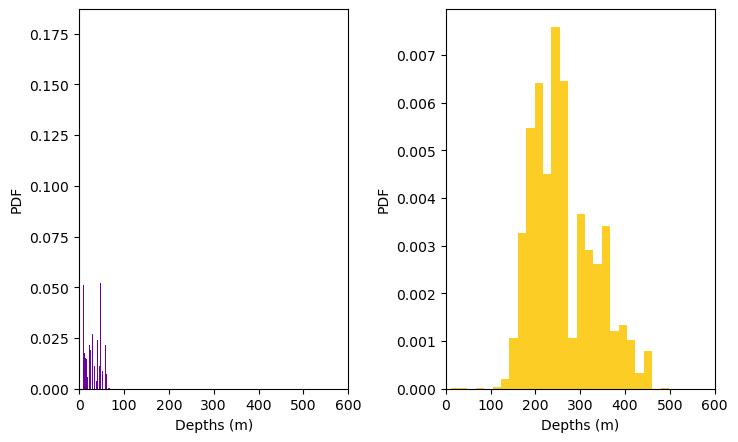

In [6]:

fig=plt.figure(figsize=(Wf,Hf4))
ax = fig.add_subplot(121)
#for cluster_ds in clusters_ds:
cluster_id = plot_clusters[0]
D=clusters_ds[cluster_id].depths.values
#plt.hist(D.flatten(),label='Shallows',density=True,  color=colorA)
plt.hist(D.flatten(),label='Shallows', **hist_kwargs, color=colorA)

cluster_id = plot_clusters[1]
D=clusters_ds[cluster_id].depths.values
#plt.hist(D.flatten(),label='Canyons',  **hist_kwargs,color=colorB)
#plt.hist(D.flatten(),label='Canyons',density=True,  color=colorB)
plt.xlim([0,600])
plt.xlabel('Depths (m)')
plt.ylabel('PDF')

#fig=plt.figure(figsize=(Wf4,Hf4))
ax = fig.add_subplot(122)
#for cluster_ds in clusters_ds:
cluster_id = plot_clusters[0]
#D=clusters_ds[cluster_id].depths.values
#plt.hist(D.flatten(),label='Shallows',density=True,  color=colorA)
#plt.hist(D.flatten(),label='Shallows', **hist_kwargs, color=colorA)

cluster_id = plot_clusters[1]
D=clusters_ds[cluster_id].depths.values
plt.hist(D.flatten(),label='Canyons',  **hist_kwargs,color=colorB)
#plt.hist(D.flatten(),label='Canyons',density=True,  color=colorB)
plt.xlim([0,600])
plt.xlabel('Depths (m)')
plt.ylabel('PDF')
plt.tight_layout()

there is some overlap in the depths

In [7]:
cluster_id=3
print(cluster_id, 'mean, max min of the depths',  clusters_ds[cluster_id].depths.mean().values, clusters_ds[cluster_id].depths.max().values, clusters_ds[cluster_id].depths.min().values)
cluster_id=0
print(cluster_id, 'mean, max min of the depths',  clusters_ds[cluster_id].depths.mean().values, clusters_ds[cluster_id].depths.max().values, clusters_ds[cluster_id].depths.min().values)


3 mean, max min of the depths 28.902779191472252 69.02298736572266 7.639793395996094
0 mean, max min of the depths 262.8805803045675 947.4501342773438 11.144325256347656


In [8]:
namdepth='/home/amh001/space_fs7/DATA/NEP36-I/HINDCAST/inputs_714x1020/Bathymetry_NEP36_GLORYS12v1OBC_10.nc'
ncT= Dataset(namdepth,'r')
bat = ncT.variables['Bathymetry'][:] #(t,z,y.x)
nav_lon = ncT.variables['nav_lon'][:][:] 
nav_lat = ncT.variables['nav_lat'][:][:]


In [9]:
#mymap=sns.choose_colorbrewer_palette('sequential', as_cmap=True)



In [10]:
#mask out narrow channels
namdepth='/home/amh001/space_fs7/DATA/NEP36-I/HINDCAST/inputs_714x1020/NEP36-channels_mask.nc'
ncT= Dataset(namdepth,'r')

#print(ncT)
shelf_mask = ncT.variables['mask'][0,:,:]  #(t,z,y.x)
nav_lat=ncT.variables['nav_lat'][:,:]
nav_lon = ncT.variables['nav_lon'][:,:]
#maskt=np.zeros(shape(bat))

<Figure size 600x600 with 0 Axes>

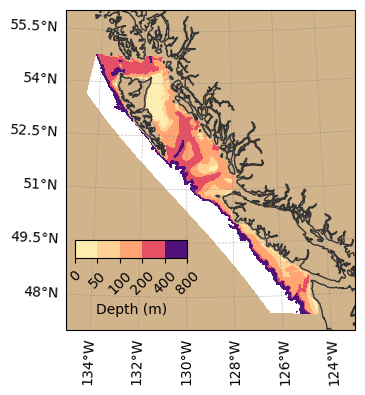

In [11]:
fig=plt.figure(figsize=(6,6))
#ax = fig.add_subplot(111)

Wf4=(95/25.4)
Hf4=(115/25.4)
color1='#00CD6C'
fig=plt.figure(figsize=(Wf4,Hf4))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(central_latitude=51, central_longitude=-129.7))
cs3 =ax.contourf(nav_lon,nav_lat,bat,cmap='magma_r',levels=[0,50,100,200,400,800], transform=ccrs.PlateCarree() )

cs =ax.contourf(nav_lon,nav_lat,shelf_mask,colors='tan',levels=[0,0.0000001],transform=ccrs.PlateCarree() )

ax.add_feature(cfeature.COASTLINE, edgecolor="0.2")
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

#cs3 =ax.pcolor(nav_lat,nav_lon,shelf_mask, c)
#plt.yticks(rotation='vertical')
lat1=56;lat2=47;lon1=-135;lon2=-123
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
axColor= fig.add_axes([0.15, 0.3, 0.3, 0.04]) 
#axColor= fig.add_axes([0.55, 0.82, 0.3, 0.04]) 
cbar=plt.colorbar(cs3,  cax = axColor, orientation="horizontal") 
#cbytick_obj = plt.getp(cbar.ax.axes, 'xticklabels')                #tricky
#plt.setp(cbytick_obj, color='w')
cbar.set_label(r'Depth (m)', color='k') 
cbar.set_ticks([0,50,100,200,400,800])
cbar.ax.tick_params(rotation=45)
#plt.colorbar(cs3)
plt.savefig('../Figures/map_depths.jpg',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

In [12]:
cluster_id = plot_clusters[0]
Ts=clusters_ds[cluster_id].T.mean('time').values

Ds=clusters_ds[cluster_id].depths.mean('time').values
Os=clusters_ds[cluster_id].O2.mean('time').values
Omegas=clusters_ds[cluster_id].OmegaA.mean('time').values

In [13]:
cluster_id = plot_clusters[1]
Tc=clusters_ds[cluster_id].T.mean('time').values

Dc=clusters_ds[cluster_id].depths.mean('time').values
Oc=clusters_ds[cluster_id].O2.mean('time').values
Omegac=clusters_ds[cluster_id].OmegaA.mean('time').values

In [14]:
#clusters_ds[cluster_id]

In [15]:
def get_ellipse_params( X, Y):
        ''' Calculate the parameters needed to graph an ellipse around a cluster of points in 2D.

            Calculate the height, width and angle of an ellipse to enclose the points in a cluster.
            Calculate the width by finding the maximum distance between the x-coordinates of points
            in the cluster, and the height by finding the maximum distance between the y-coordinates
            in the cluster. Multiple both by a scale factor to give padding around the points when
            constructing the ellipse. Calculate the angle by taking the inverse tangent of the
            gradient of the regression line. Note that tangent solutions repeat every 180 degrees,
            and so to ensure the correct solution has been found for plotting, add a correction
            factor of +/- 90 degrees if the magnitude of the angle exceeds 45 degrees.

            Args:
                points (ndarray): The points in a cluster to enclose with an ellipse, containing n
                                  ndarray elements representing each point, each with d elements
                                  representing the coordinates for the point.

            Returns:
                width (float):  The width of the ellipse.
                height (float): The height of the ellipse.
                angle (float):  The angle of the ellipse in degrees.
        '''
        n_std=2
        points=p = np.c_[X,Y]

        SCALE = 1
        centre=(np.mean(X), np.mean(Y))
        #median_x = np.median(X, axis=0)
        #median_y = np.median(Y, axis=0)
        # Robustly estimate the center of the data
        #robust_cov = MinCovDet().fit(X,Y)
        #center = robust_cov.location_
        #centre=(median_x,median_y)
        width = np.amax(points[:,0]) - np.amin(points[:,0])
        height = np.amax(points[:,1]) - np.amin(points[:,1])

        # Calculate angle
        x_reg, y_reg = [[p[0]] for p in points], [[p[1]] for p in points]
        grad = LinearRegression().fit(x_reg, y_reg).coef_[0][0]
        angle = np.degrees(np.arctan(grad))
        print('angle', angle)
        # Account for multiple solutions of arctan
        if angle < -45: angle += 90
        elif angle > 45: angle -= 90
        print(angle)
        #cov = np.cov(X, Y)
        scale_x = SCALE*width#/(np.sqrt(cov[0, 0]) * n_std)
        scale_y = SCALE*height#np.sqrt(cov[1, 1]) * n_std
        
        ellipse = Ellipse(centre, height=scale_y,width=scale_x,angle=(angle), ec="k", fc='None', alpha=1)
        ax.add_patch(ellipse)

        return 

angle 1.0768257
1.0768257


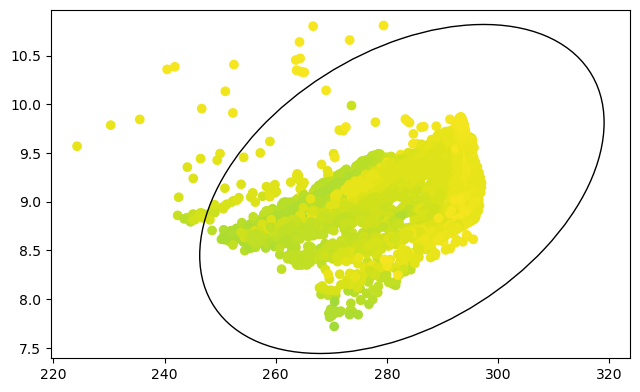

In [16]:
fig=plt.figure(figsize=(Wf,Hf4))
ax = fig.add_subplot(111)
#sm=plot_ellipse(Os,Omegas,Ds, Oc,Omegac, Dc, 'O2','OmegaA')

sm=plt.scatter(Os.flatten(),Ts.flatten(),c=Ds.flatten(), alpha=1, cmap='viridis_r',vmin=0, vmax=500)

get_ellipse_params(Os,Ts)

#plt.ylim([0,2]);plt.xlim([0,350])

angle 5.134310496987067
5.134310496987067
angle 1.9228210040354856
1.9228210040354856
angle 72.55500351541028
-17.444996484589723
angle 42.63559607481112
42.63559607481112


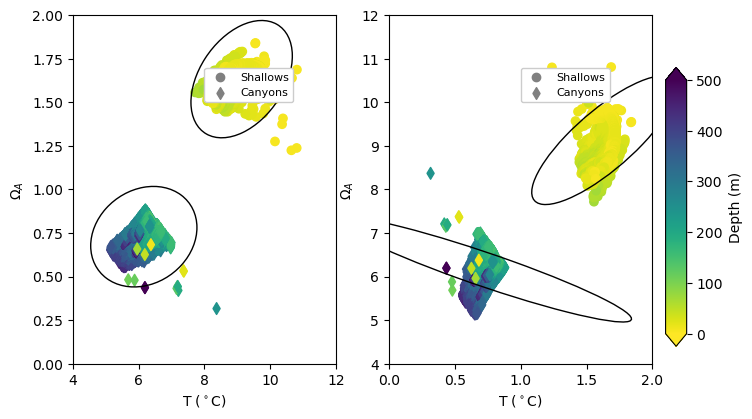

In [17]:


fig=plt.figure(figsize=(Wf,Hf4))
ax = fig.add_subplot(121)

sm=plt.scatter(Ts.flatten(),Omegas.flatten(),c=Ds.flatten(), alpha=1, cmap='viridis_r',vmin=0, vmax=500)
sm=plt.scatter(Tc.flatten(),Omegac.flatten(),c=Dc.flatten(),marker='d', alpha=1, cmap='viridis_r',vmin=0, vmax=500)

#sm=plt.scatter(Os[Ds<100].flatten(),Omegas[Ds<100].flatten(),c=Ds[Ds<100].flatten(), alpha=al, cmap='viridis_r',vmin=0, vmax=500)
#sm=plt.scatter(Oc[Dc<100].flatten(),Omegac[Dc<100].flatten(),c=Dc[Dc<100].flatten(),marker='d', alpha=al, cmap='viridis_r',vmin=0, vmax=500)

labs=['Shallows','Canyons']; marks=['o','d']
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")

for hh in np.arange(2):
    plt.scatter(-100,-100, color='0.5',marker=marks[hh],label=labs[hh])

plt.legend(loc=(0.5,0.75),framealpha=1.0,fontsize=8)

#encircle(Os, Omegas, ec="k", fc="gold", alpha=.1)
#encircle(Oc, Omegac, ec="k", fc=color1, alpha=.1)
#plt.ylim([0,2]);plt.xlim([0,350])
get_ellipse_params(Ts,Omegas)
get_ellipse_params(Tc,Omegac)

clabel='Depth (m)'
plt.ylim([0,2]);plt.xlim([4,12])

ax = fig.add_subplot(122)

sm=plt.scatter(Omegas.flatten(),Ts.flatten(),c=Ds.flatten(), alpha=1, cmap='viridis_r',vmin=0, vmax=500)
sm=plt.scatter(Omegac.flatten(),Tc.flatten(),c=Dc.flatten(),marker='d', alpha=1, cmap='viridis_r',vmin=0, vmax=500)

#sm=plt.scatter(Os[Ds<100].flatten(),Omegas[Ds<100].flatten(),c=Ds[Ds<100].flatten(), alpha=al, cmap='viridis_r',vmin=0, vmax=500)
#sm=plt.scatter(Oc[Dc<100].flatten(),Omegac[Dc<100].flatten(),c=Dc[Dc<100].flatten(),marker='d', alpha=al, cmap='viridis_r',vmin=0, vmax=500)

labs=['Shallows','Canyons']; marks=['o','d']
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")

for hh in np.arange(2):
    plt.scatter(-100,-100, color='0.5',marker=marks[hh],label=labs[hh])

plt.legend(loc=(0.5,0.75),framealpha=1.0,fontsize=8)

#encircle(Os, Omegas, ec="k", fc="gold", alpha=.1)
#encircle(Oc, Omegac, ec="k", fc=color1, alpha=.1)
#plt.ylim([0,2]);plt.xlim([0,350])
get_ellipse_params(Omegas,Ts)
get_ellipse_params(Omegac,Tc)

clabel='Depth (m)'
plt.xlim([0,2]);plt.ylim([4,12])


axins = inset_axes(ax,
           width="8%",  # width = 5% of parent_bbox width
           height="80%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.05, 0.05, 1, 1),
           bbox_transform=ax.transAxes,
           borderpad=0,
       )
cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')
cbar.set_label(clabel)

angle 0.2823982467122653
0.2823982467122653
angle 0.2179091791486652
0.2179091791486652
angle 1.0768257
1.0768257
angle 0.34214425
0.34214425
angle 5.134310496987067
5.134310496987067
angle 1.9228210040354856
1.9228210040354856


/tmp/ipykernel_51779/2416787552.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


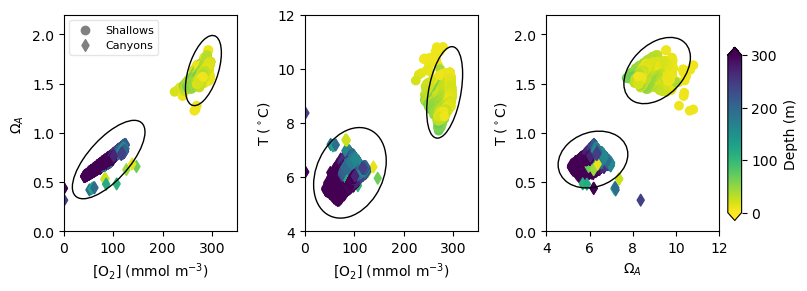

In [18]:


fig=plt.figure(figsize=(Wf,Hf/3))
ax = fig.add_subplot(131)
vm=300
sm=plt.scatter(Os.flatten(),Omegas.flatten(),c=Ds.flatten(), alpha=1, cmap='viridis_r',vmin=0, vmax=vm)
sm=plt.scatter(Oc.flatten(),Omegac.flatten(),c=Dc.flatten(),marker='d', alpha=1, cmap='viridis_r',vmin=0, vmax=vm)

#sm=plt.scatter(Os[Ds<100].flatten(),Omegas[Ds<100].flatten(),c=Ds[Ds<100].flatten(), alpha=al, cmap='viridis_r',vmin=0, vmax=500)
#sm=plt.scatter(Oc[Dc<100].flatten(),Omegac[Dc<100].flatten(),c=Dc[Dc<100].flatten(),marker='d', alpha=al, cmap='viridis_r',vmin=0, vmax=500)

labs=['Shallows','Canyons']; marks=['o','d']
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")

for hh in np.arange(2):
    plt.scatter(-100,-100, color='0.5',marker=marks[hh],label=labs[hh])

plt.legend(framealpha=0.5,fontsize=8,)

get_ellipse_params(Os,Omegas)
get_ellipse_params(Oc,Omegac)

plt.ylim([0,2.2]);plt.xlim([0,350])

#############
ax = fig.add_subplot(132)

sm=plt.scatter(Os.flatten(),Ts.flatten(),c=Ds.flatten(), alpha=1, cmap='viridis_r',vmin=0, vmax=vm)
sm=plt.scatter(Oc.flatten(),Tc.flatten(),c=Dc.flatten(),marker='d', alpha=1, cmap='viridis_r',vmin=0, vmax=vm)

#sm=plt.scatter(Os[Ds<100].flatten(),Omegas[Ds<100].flatten(),c=Ds[Ds<100].flatten(), alpha=al, cmap='viridis_r',vmin=0, vmax=500)
#sm=plt.scatter(Oc[Dc<100].flatten(),Omegac[Dc<100].flatten(),c=Dc[Dc<100].flatten(),marker='d', alpha=al, cmap='viridis_r',vmin=0, vmax=500)

get_ellipse_params(Os,Ts)
get_ellipse_params(Oc,Tc)

plt.xlim([0,350]);plt.ylim([4,12])

var='T'
ax.set_ylabel(f"{long_names[var]} ({units[var]})")
var='O2'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
#############
ax = fig.add_subplot(133)

sm=plt.scatter(Ts.flatten(),Omegas.flatten(),c=Ds.flatten(), alpha=1, cmap='viridis_r',vmin=0, vmax=vm)
sm=plt.scatter(Tc.flatten(),Omegac.flatten(),c=Dc.flatten(),marker='d', alpha=1, cmap='viridis_r',vmin=0, vmax=vm)

var='T'
ax.set_ylabel(f"{long_names[var]} ({units[var]})")
var='OmegaA'
ax.set_xlabel(f"{long_names[var]} {units[var]}")

get_ellipse_params(Ts,Omegas)
get_ellipse_params(Tc,Omegac)


plt.ylim([0,2.2]);plt.xlim([4,12])



###############33
clabel='Depth (m)'

axins = inset_axes(ax,
           width="8%",  # width = 5% of parent_bbox width
           height="80%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.05, 0.05, 1, 1),
           bbox_transform=ax.transAxes,
           borderpad=0,
       )
cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')
cbar.set_label(clabel)
plt.tight_layout()
plt.savefig('../Figures/Cluster_depths_3panel.jpg',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

/tmp/ipykernel_51779/4132995235.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sm=ax.scatter(Ts,Os,Omegas, marker=mark[kk],  s=40, color=next(colors),vmin=0,vmax=100)
/tmp/ipykernel_51779/4132995235.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sm=ax.scatter(Ts,Os,Omegas, marker=mark[kk],  s=40, color=next(colors),vmin=0,vmax=100)
/tmp/ipykernel_51779/4132995235.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sm=ax.scatter(Ts,Os,Omegas, marker=mark[kk],  s=40, color=next(colors),vmin=0,vmax=100)
/tmp/ipykernel_51779/4132995235.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sm=ax.scatter(Ts,Os,Omegas, marker=mark[kk],  s=40, color=next(colors),vmin=0,vmax=100)
/tmp/ipykernel_51779/4132995235.py:14: UserWarning: No data for colormapping provided via 'c

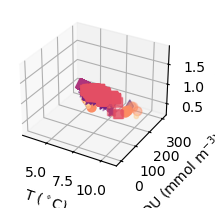

In [19]:
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 6)))

mark=['d','*','^', 's', 'o','.']
fig=plt.figure(figsize=(Wf4+1,Hf4))
ax = fig.add_subplot(121, projection='3d')
for kk in np.arange(6):

    cluster_id = kk
    Ts=clusters_ds[cluster_id].T.mean('time').values

    Ds=clusters_ds[cluster_id].depths.mean('time').values
    Os=clusters_ds[cluster_id].AOU.mean('time').values
    Omegas=clusters_ds[cluster_id].OmegaA.mean('time').values
    sm=ax.scatter(Ts,Os,Omegas, marker=mark[kk],  s=40, color=next(colors),vmin=0,vmax=100)
#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)

#cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')
#cbar.set_label(clabel)
var='OmegaA'
ax.set_zlabel(f"{long_names[var]} {units[var]}")
var='AOU'
ax.set_ylabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
fig.subplots_adjust(right=0.9)
#plt.tight_layout()
#plt.savefig('../Figures/Clusters_3d.png',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

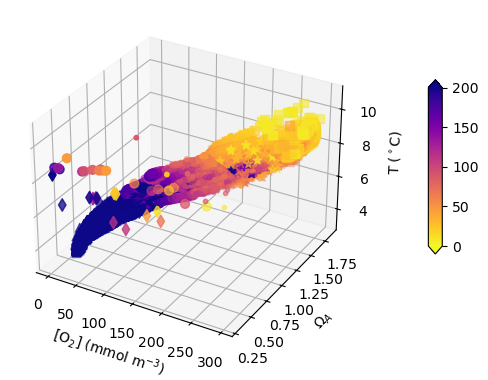

In [20]:
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 6)))

mark=['d','*','^', 's', 'o','.']
fig=plt.figure(figsize=(Wf4+1,Hf4))
ax = fig.add_subplot(111, projection='3d')
for kk in np.arange(6):

    cluster_id = kk
    Ts=clusters_ds[cluster_id].T.mean('time').values

    Ds=clusters_ds[cluster_id].depths.mean('time').values
    Os=clusters_ds[cluster_id].O2.mean('time').values
    Omegas=clusters_ds[cluster_id].OmegaA.mean('time').values
    sm=ax.scatter(Os,Omegas,Ts, marker=mark[kk], c=Ds, s=40, cmap='plasma_r',vmin=0,vmax=200)
#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)

#cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')
#cbar.set_label(clabel)
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
#fig.subplots_adjust(right=1.1)
#plt.tight_layout()

axins = inset_axes(ax,
           width="4%",  # width = 5% of parent_bbox width
           height="50%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.2, 0.3, 1, 1),
           bbox_transform=ax.transAxes,
           borderpad=0,
       )
cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')

plt.savefig('../Figures/Clusters_3d_depths.jpg',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

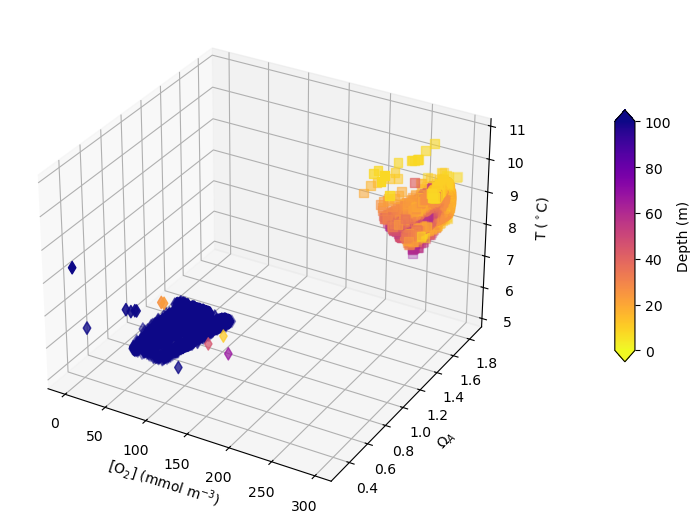

In [21]:
mark=['d','*','^', 's', 'o','.']
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d', gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=1))
fig, ax = plt.subplots(subplot_kw={'projection': '3d'},
                       gridspec_kw=dict(top=1.07, bottom=0.02, left=0, right=2))
for kk in [3,0]:

    cluster_id = kk
    Ts=clusters_ds[cluster_id].T.mean('time').values

    Ds=clusters_ds[cluster_id].depths.mean('time').values
    Os=clusters_ds[cluster_id].O2.mean('time').values
    Omegas=clusters_ds[cluster_id].OmegaA.mean('time').values
    #sm1=ax.scatter(Os,Omegas,Ts, marker=mark[kk], c=Ds, s=40, cmap='Greys_r',vmin=0,vmax=100)
    sm=ax.scatter3D(Os,Omegas,Ts, marker=mark[kk], c=Ds, s=40, cmap='plasma_r',vmin=0,vmax=100)

#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)
clabel='Depth (m)'

axins = inset_axes(ax,
           width="4%",  # width = 5% of parent_bbox width
           height="50%",  # height : 50%
           loc='lower left',
           bbox_to_anchor=(1.2, 0.3, 1, 1),
           bbox_transform=ax.transAxes,
           borderpad=0,
       )
#cbar=fig.colorbar(sm1, cax=axins,extend='both',orientation='vertical')
cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')

#plt.colorbar(extend='both', extendfrac=0.1, extendrect=True, label='Value', ticks=np.linspace(0, 1, 5))
#plt.clim(0, 1)  # Set color limits

# Add a grey color to the colorbar
grey_color = '#D3D3D3'  # Grey color
#cbar = plt.colorbar()
#cbar.ax.get_children()[0].set_color(grey_color)

cbar.set_label(clabel)
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
#plt.tight_layout()
#fig.subplots_adjust(left=-0.11)
plt.savefig('../Figures/Cluster_depths_3d.jpg',bbox_inches='tight',transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

The maximum depth of cluster 2 (Shallows) is 77m, so we wille xtract the region of all depths <77m for comparison (see prepare_depth_comparison)

In [22]:
datapath = '/home/amh001/space_fs7/DATA/NEP36-CanOE/cluster_depth/'
file='NEP36_cluster_less69m_y*.nc'
df69=xr.open_mfdataset(datapath+file)

In [23]:
T69=df69.T.mean('time').values
D69=df69.depths.mean('time').values
O69=df69.O2.mean('time').values
Omega69=df69.Omega_A.mean('time').values
#sm=ax.scatter(O69,Omega69,T69, marker='d', c=D69, s=40, cmap='plasma_r',vmin=0,vmax=100)


68.98625183105469 7.639793395996094


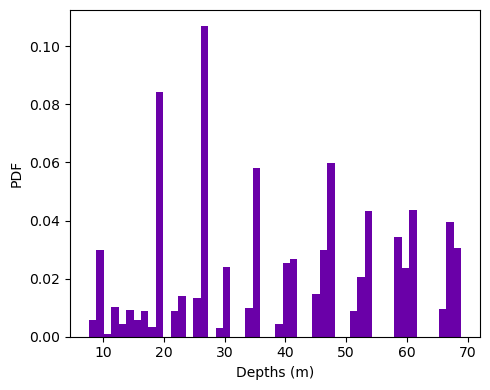

In [24]:

fig=plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
plt.hist(D69.flatten(),label='Shallows', **hist_kwargs, color=colorA)
print(np.nanmax(D69), np.nanmin(D69))

plt.xlabel('Depths (m)')
plt.ylabel('PDF')

#
plt.tight_layout()
plt.savefig('../Figures/depths_69m.jpg',bbox_inches='tight',transparent=False,dpi=500)

In [25]:
nlon69=df69.nav_lon.values
nlat69=df69.nav_lat.values

In [26]:
cluster_id=3 #(shallows)
Tsh=clusters_ds[cluster_id].T.mean('time').values
Dsh=clusters_ds[cluster_id].depths.mean('time').values
Osh=clusters_ds[cluster_id].O2.mean('time').values
Omegash=clusters_ds[cluster_id].OmegaA.mean('time').values

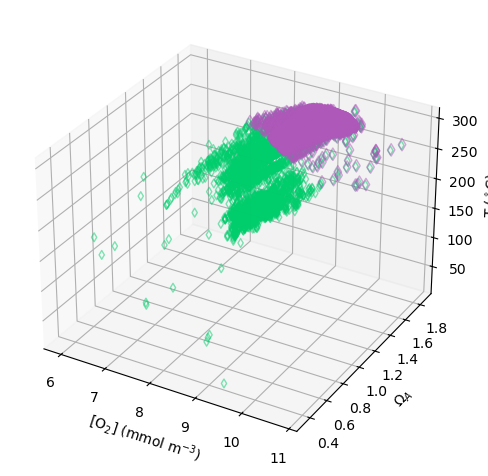

In [27]:
al=0.5
mark=['d','*','o', 's', '^','.']
fig = plt.figure()

ax = plt.axes(projection='3d',computed_zorder=False)

sm=ax.scatter(T69,Omega69,O69, marker='d',  edgecolors=color1,color='None',alpha=al)

sm=ax.scatter(Tsh,Omegash,Osh, marker=mark[kk],  s=40, edgecolors=color2,color='None',zorder=1000, alpha=al)


#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)
clabel='Depth (m)'

#cbar=fig.colorbar(sm1, cax=axins,extend='both',orientation='vertical')
#cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')

#plt.colorbar(extend='both', extendfrac=0.1, extendrect=True, label='Value', ticks=np.linspace(0, 1, 5))
#plt.clim(0, 1)  # Set color limits

# Add a grey color to the colorbar
#grey_color = '#D3D3D3'  # Grey color
#cbar = plt.colorbar()
#cbar.ax.get_children()[0].set_color(grey_color)

#cbar.set_label(clabel)
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
#ax.view_init(40, 10) 
plt.tight_layout()

plt.savefig('../Figures/Cluster_vsdepthlt69_3d.jpg',bbox_inches='tight',transparent=False,dpi=500)

In [28]:
def plot_myhist(X,bins,color, label):
    histogram, bins = np.histogram(X,  bins=bins, density=True); 
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    plt.plot(bin_centers, histogram, color =color, linewidth=1.5,label=label)

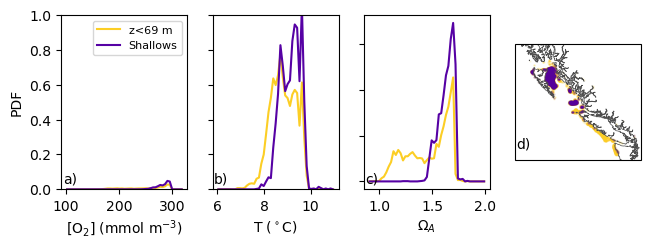

In [29]:
colors =itertools.cycle(plt.get_cmap('plasma')(np.linspace(0.15,0.90, 4)))
colorA=next(colors)
colorC=next(colors)
colorD=next(colors)
colorB=next(colors)

cluster_color = {3:colorA,69:colorB, 100:colorD}

fig=plt.figure(figsize=(Wf,Hf4/2))
at=0.01
bt=0.1
subpanel = ['a)','b)','c)','d)','e)', 'f)', 'c)']

ax = fig.add_subplot(144, projection=ccrs.Miller())

ii=3
cluster_id = 3#plot_clusters[ii]
nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values

ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()




plt.scatter(x=nlon69, y=nlat69,
            color=cluster_color[69],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[3],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt+.1, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)


ax = fig.add_subplot(141)
var='O2'
a=100;b=320
bins = np.linspace(a, b, 50)
X=O69[~np.isnan(O69)].flatten()
plot_myhist(X,bins,cluster_color[69], 'z<69 m')

X=Osh[~np.isnan(Osh)].flatten()
plot_myhist(X,bins,cluster_color[3], 'Shallows')
maxy=1
plt.ylim([0,maxy])

ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ax.set_ylabel('PDF')
plt.legend(fontsize=8)
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#####
ax = fig.add_subplot(142)
var='T'
a=6;b=11
bins = np.linspace(a, b, 50)
X=T69[~np.isnan(T69)].flatten()
plot_myhist(X,bins, cluster_color[69],'')

X=Tsh[~np.isnan(Tsh)].flatten()
plot_myhist(X,bins, cluster_color[3],'')
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
plt.ylim([0,maxy])
ax.set_yticklabels([])
ax.text(at, bt, subpanel[1], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

ax = fig.add_subplot(143)
var='OmegaA'
a=0.9;b=2
bins = np.linspace(a, b, 50)
X=Omega69[~np.isnan(Omega69)].flatten()
plot_myhist(X,bins,cluster_color[69],'')

X=Omegash[~np.isnan(Omegash)].flatten()
plot_myhist(X,bins,cluster_color[3],'')
#plt.ylim([0,maxy])
ax.set_yticklabels([])
ax.set_xlabel(f"{long_names[var]} {units[var]}")
ax.text(at, bt, subpanel[2], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#plt.tight_layout(vspace=0.5)
plt.savefig('../Figures/Shallows_vs_depths69.png',bbox_inches='tight', transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

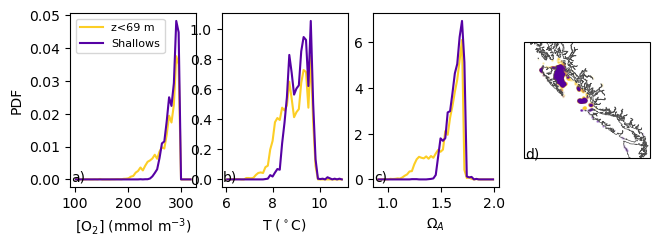

In [30]:
fig=plt.figure(figsize=(Wf,Hf4/2))
at=0.01
bt=0.1
subpanel = ['a)','b)','c)','d)','e)', 'f)', 'c)']

ax = fig.add_subplot(144, projection=ccrs.Miller())


nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values

ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()




plt.scatter(x=nlon69[nlat69>51], y=nlat69[nlat69>51],
            color=cluster_color[69],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[cluster_id],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)


ax = fig.add_subplot(141)
var='O2'
a=100;b=320
bins = np.linspace(a, b, 50)
X=O69[nlat69>51]
X=X[~np.isnan(X)].flatten()
plot_myhist(X,bins,cluster_color[69], 'z<69 m')

X=Osh[~np.isnan(Osh)].flatten()
plot_myhist(X,bins,cluster_color[cluster_id], 'Shallows')
maxy=5
#plt.ylim([0,maxy])

ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ax.set_ylabel('PDF')
plt.legend(fontsize=8)
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#####
ax = fig.add_subplot(142)
var='T'
a=6;b=11
bins = np.linspace(a, b, 50)
X=T69[nlat69>51]
X=X[~np.isnan(X)].flatten()
plot_myhist(X,bins, cluster_color[69],'')

X=Tsh[~np.isnan(Tsh)].flatten()
plot_myhist(X,bins, cluster_color[cluster_id],'')
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
#plt.ylim([0,maxy])
#ax.set_yticklabels([])
ax.text(at, bt, subpanel[1], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

ax = fig.add_subplot(143)
var='OmegaA'
a=0.9;b=2
bins = np.linspace(a, b, 50)
X=Omega69[nlat69>51]
X=X[~np.isnan(X)].flatten()
plot_myhist(X,bins,cluster_color[69],'')

X=Omegash[~np.isnan(Omegash)].flatten()
plot_myhist(X,bins,cluster_color[cluster_id],'')
#plt.ylim([0,maxy])
#ax.set_yticklabels([])
ax.set_xlabel(f"{long_names[var]} {units[var]}")
ax.text(at, bt, subpanel[2], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#plt.tight_layout(vspace=0.5)
plt.savefig('../Figures/Shallows_vs_depths69_latgt51.jpg',bbox_inches='tight', transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

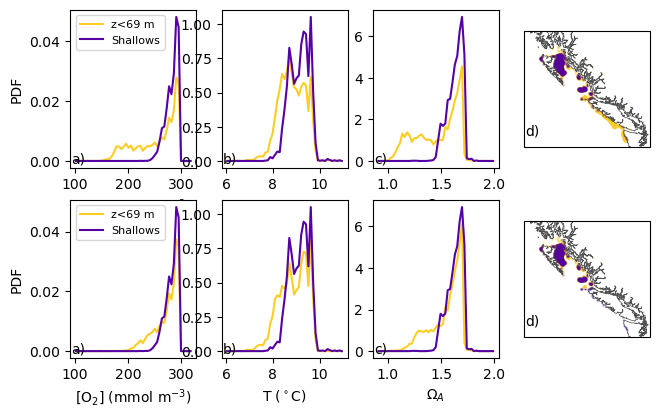

In [31]:
fig=plt.figure(figsize=(Wf,Hf4))
at=0.01
bt=0.1
subpanel = ['a)','b)','c)','d)','e)', 'f)', 'g)', 'h']

ax = fig.add_subplot(244, projection=ccrs.Miller())


nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values

ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()




plt.scatter(x=nlon69, y=nlat69,
            color=cluster_color[69],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[cluster_id],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt+0.1, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)


ax = fig.add_subplot(241)
var='O2'
a=100;b=320
bins = np.linspace(a, b, 50)
X=O69[~np.isnan(O69)].flatten()
plot_myhist(X,bins,cluster_color[69], 'z<69 m')

X=Osh[~np.isnan(Osh)].flatten()
plot_myhist(X,bins,cluster_color[cluster_id], 'Shallows')
#maxy=1000
#plt.ylim([0,maxy])

ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ax.set_ylabel('PDF')
plt.legend(fontsize=8)
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#####
ax = fig.add_subplot(242)
var='T'
a=6;b=11
bins = np.linspace(a, b, 50)
X=T69[~np.isnan(T69)].flatten()
plot_myhist(X,bins, cluster_color[69],'')

X=Tsh[~np.isnan(Tsh)].flatten()
plot_myhist(X,bins, cluster_color[cluster_id],'')
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
#plt.ylim([0,maxy])
#ax.set_yticklabels([])
ax.text(at, bt, subpanel[1], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

ax = fig.add_subplot(243)
var='OmegaA'
a=0.9;b=2
bins = np.linspace(a, b, 50)
X=Omega69[~np.isnan(Omega69)].flatten()
plot_myhist(X,bins,cluster_color[69],'')

X=Omegash[~np.isnan(Omegash)].flatten()
plot_myhist(X,bins,cluster_color[cluster_id],'')
#plt.ylim([0,maxy])
#ax.set_yticklabels([])
ax.set_xlabel(f"{long_names[var]} {units[var]}")
ax.text(at, bt, subpanel[2], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
######################################3

at=0.01
bt=0.1
subpanel = ['a)','b)','c)','d)','e)', 'f)', 'g)', 'h)']

ax = fig.add_subplot(248, projection=ccrs.Miller())

nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values

ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()




plt.scatter(x=nlon69[nlat69>51], y=nlat69[nlat69>51],
            color=cluster_color[69],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[cluster_id],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt+0.1, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)


ax = fig.add_subplot(245)
var='O2'
a=100;b=320
bins = np.linspace(a, b, 50)
X=O69[nlat69>51]
X=X[~np.isnan(X)].flatten()
plot_myhist(X,bins,cluster_color[69], 'z<69 m')

X=Osh[~np.isnan(Osh)].flatten()
plot_myhist(X,bins,cluster_color[cluster_id], 'Shallows')
maxy=5
#plt.ylim([0,maxy])

ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ax.set_ylabel('PDF')
plt.legend(fontsize=8)
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#####
ax = fig.add_subplot(246)
var='T'
a=6;b=11
bins = np.linspace(a, b, 50)
X=T69[nlat69>51]
X=X[~np.isnan(X)].flatten()
plot_myhist(X,bins, cluster_color[69],'')

X=Tsh[~np.isnan(Tsh)].flatten()
plot_myhist(X,bins, cluster_color[cluster_id],'')
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
#plt.ylim([0,maxy])
#ax.set_yticklabels([])
ax.text(at, bt, subpanel[1], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

ax = fig.add_subplot(247)
var='OmegaA'
a=0.9;b=2
bins = np.linspace(a, b, 50)
X=Omega69[nlat69>51]
X=X[~np.isnan(X)].flatten()
plot_myhist(X,bins,cluster_color[69],'')

X=Omegash[~np.isnan(Omegash)].flatten()
plot_myhist(X,bins,cluster_color[cluster_id],'')
#plt.ylim([0,maxy])
#ax.set_yticklabels([])
ax.set_xlabel(f"{long_names[var]} {units[var]}")
ax.text(at, bt, subpanel[2], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#plt.tight_layout(vspace=0.5)
#plt.savefig('../Figures/Shallows_vs_depths69_latgt51.jpg',bbox_inches='tight', transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      



#plt.tight_layout(vspace=0.5)
plt.savefig('../Figures/Shallows_vs_depths69_ALL.jpg',bbox_inches='tight', transparent=False,dpi=500)#'+str(cluster_names[cluster_label])+'.jpg', format='jpg', bbox_inches='tight',transparent=False,dpi=500)      

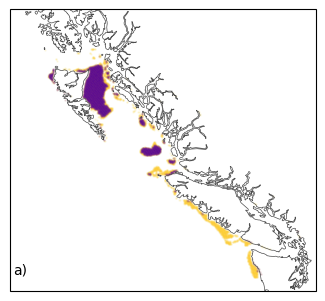

In [32]:
fig=plt.figure(figsize=(Wf,Hf))
################


ii=2
cluster_id = 3#plot_clusters[ii]
nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values
ax = fig.add_subplot(3,2,ii+1, projection=ccrs.Miller())
#ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()




plt.scatter(x=nlon69, y=nlat69,
            color=cluster_color[69],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[cluster_id],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
#plt.subplots_adjust(wspace=-0.1)
plt.tight_layout()
#plt.savefig('../Figures/clusters.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

## combined figs

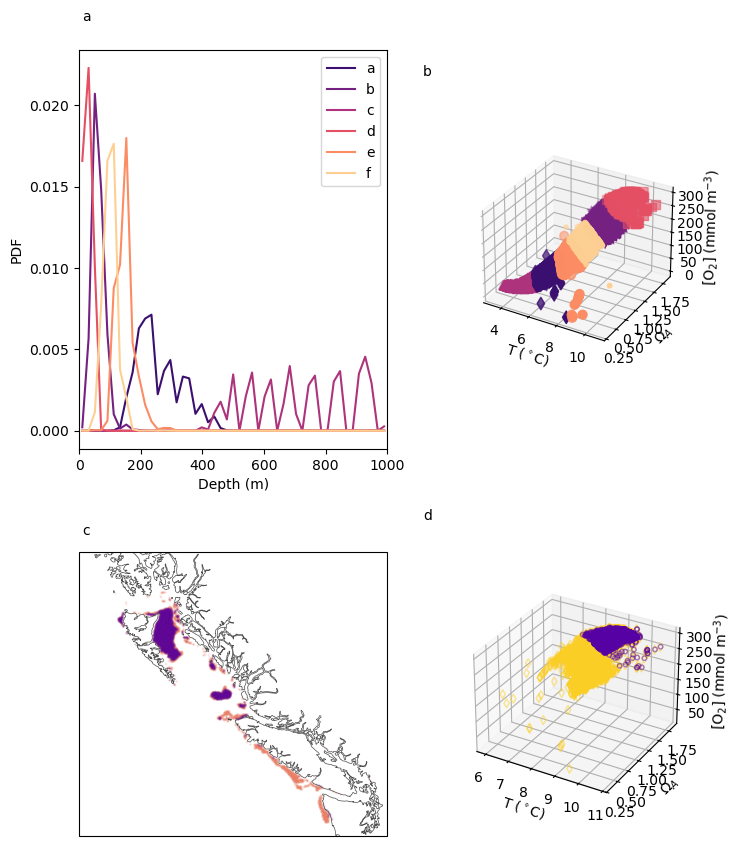

In [33]:
fig=plt.figure(figsize=(Wf,Hf))
ax = fig.add_subplot(221)
bt=1.1
#for cluster_ds in clusters_ds:
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 6)))# same as clusters plot

#colors =itertools.cycle(plt.get_cmap('inferno')(np.linspace(0.15,0.9, 6)))
a=0;b=1000
bins = np.linspace(a, b, 50)
subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']

for ii in np.arange(6):
    col=next(colors)
    cluster_id = ii
    D=clusters_ds[cluster_id].depths.values.flatten()
    #plt.hist(D.flatten(),label='Shallows',density=True,  color=colorA)
    #plt.hist(D,label=subpanel[ii], **hist_kwargs, color=col)
    plot_myhist(D,bins,col, subpanel[ii])#cluster_names[ii])
plt.legend()
plt.ylabel('PDF')
plt.xlabel('Depth (m)')
plt.xlim([0,1000])
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

##################################
mark=['d','*','^', 's', 'o','.']

ax = fig.add_subplot(222, projection='3d')
for kk in np.arange(6):

    cluster_id = kk
    Ts=clusters_ds[cluster_id].T.mean('time').values

    Ds=clusters_ds[cluster_id].depths.mean('time').values
    Os=clusters_ds[cluster_id].O2.mean('time').values
    Omegas=clusters_ds[cluster_id].OmegaA.mean('time').values
    sm=ax.scatter(Ts,Omegas, Os,marker=mark[kk],  s=40, color=next(colors))
#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)
ax.text2D(at, bt, subpanel[1], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

#cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')
#cbar.set_label(clabel)
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ax.set_box_aspect(aspect=None, zoom=0.7)

#fig.subplots_adjust(right=0.9)
##############################
ax = fig.add_subplot(223, projection=ccrs.Miller())

ii=2
cluster_id = 3#plot_clusters[ii]
nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values

ax.add_feature(cfeature.COASTLINE, edgecolor='0.3', linewidth=0.5)
plt.scatter(x=nlon69, y=nlat69,
            color=cluster_color[100],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[cluster_id],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt, subpanel[2], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
###################

al=0.5

ax = fig.add_subplot(224, projection='3d',computed_zorder=False)


sm=ax.scatter(T69,Omega69,O69, marker='d',  edgecolors=cluster_color[69],color='None',alpha=al)

sm=ax.scatter(Tsh,Omegash,Osh, marker=mark[kk],  s=40, edgecolors=cluster_color[cluster_id],color='None',zorder=1000, alpha=al)


#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)
clabel='Depth (m)'

#cbar=fig.colorbar(sm1, cax=axins,extend='both',orientation='vertical')
#cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')

#plt.colorbar(extend='both', extendfrac=0.1, extendrect=True, label='Value', ticks=np.linspace(0, 1, 5))
#plt.clim(0, 1)  # Set color limits

# Add a grey color to the colorbar
#grey_color = '#D3D3D3'  # Grey color
#cbar = plt.colorbar()
#cbar.ax.get_children()[0].set_color(grey_color)

#cbar.set_label(clabel)
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
#ax.view_init(40, 10) 
ax.set_box_aspect(aspect=None, zoom=0.75)
#plt.subplots_adjust(wspace=-0.05)
ax.text2D(at, bt, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)

plt.tight_layout()
plt.savefig('../Figures/Clusters_3D.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

Text(0.01, 1.1, 'd')

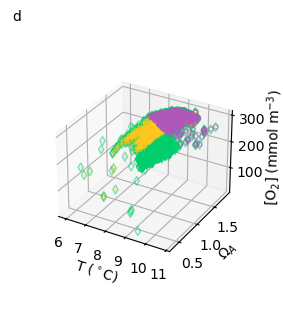

In [34]:
fig=plt.figure(figsize=(Wf,Hf))

ax = fig.add_subplot(224, projection='3d',computed_zorder=False)


sm=ax.scatter(T69,Omega69,O69, marker='d',  edgecolors=color1,color='None',alpha=al)

sm=ax.scatter(Tsh,Omegash,Osh, marker=mark[kk],  s=40, edgecolors=color2,color='None',zorder=1000, alpha=al)

X=T69[nlat69>51]
Y=Omega69[nlat69>51]
Z=O69[nlat69>51]

sm=ax.scatter(X,Y,Z, marker='+' , linewidth=0.5, color=color3,alpha=al)

#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)
clabel='Depth (m)'

#cbar=fig.colorbar(sm1, cax=axins,extend='both',orientation='vertical')
#cbar=fig.colorbar(sm, cax=axins,extend='both',orientation='vertical')

#plt.colorbar(extend='both', extendfrac=0.1, extendrect=True, label='Value', ticks=np.linspace(0, 1, 5))
#plt.clim(0, 1)  # Set color limits

# Add a grey color to the colorbar
#grey_color = '#D3D3D3'  # Grey color
#cbar = plt.colorbar()
#cbar.ax.get_children()[0].set_color(grey_color)

#cbar.set_label(clabel)
var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ax.set_box_aspect(aspect=None, zoom=0.75)
ax.text2D(at, bt, subpanel[3], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)


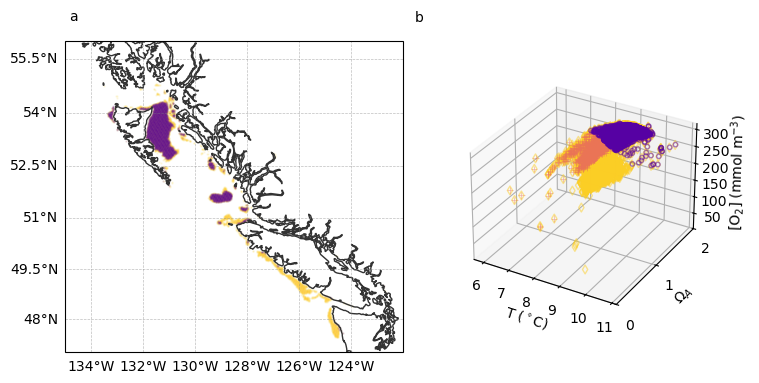

In [35]:
fig=plt.figure(figsize=(Wf,Hf), constrained_layout=True)

bt=1.1
#for cluster_ds in clusters_ds:
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.9, 6)))# same as clusters plot

#colors =itertools.cycle(plt.get_cmap('inferno')(np.linspace(0.15,0.9, 6)))
a=0;b=1000
bins = np.linspace(a, b, 50)
subpanel = ['a','b','c','d', 'e', 'f', 'g','h','i','j']


##############################
ax = fig.add_subplot(121, projection=ccrs.Miller())

ii=2
cluster_id = 3#plot_clusters[ii]
nlat=clusters_ds[cluster_id][var][0,:].nav_lat.values
nlon=clusters_ds[cluster_id][var][0,:].nav_lon.values


ax.add_feature(cfeature.COASTLINE, edgecolor="0.2")
#ax.add_feature(cfeature.BORDERS, edgecolor="0.2")
#ax.gridlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.top_labels = False
gl.right_labels = False

plt.scatter(x=nlon69, y=nlat69,
            color=cluster_color[69],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(x=nlon, y=nlat,
            color=cluster_color[cluster_id],
            s=.5,
            alpha=0.1,
            transform=ccrs.PlateCarree()) ## Important

lat1=56;lat2=47;lon1=-135;lon2=-122
ax.set_extent([ lon1, lon2, lat1,lat2], crs=ccrs.PlateCarree())
ax.text(at, bt, subpanel[0], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
###################

al=0.5

ax = fig.add_subplot(122, projection='3d',computed_zorder=False)


sm=ax.scatter(T69,Omega69,O69, marker='d',  edgecolors=cluster_color[69],color='None',alpha=al)

sm=ax.scatter(Tsh,Omegash,Osh, marker=mark[kk],  s=40, edgecolors=cluster_color[cluster_id],color='None',zorder=1000, alpha=al)

sm=ax.scatter(X,Y,Z, marker='+' , linewidth=0.5, color=cluster_color[100],alpha=al)

#ax.scatter(Oc,Omegac,Tc, marker="d", c=Dc, s=40, cmap="magma_r",vmin=0, vmax=100)
clabel='Depth (m)'


var='OmegaA'
ax.set_ylabel(f"{long_names[var]} {units[var]}")
var='O2'
ax.set_zlabel(f"{long_names[var]} ({units[var]})")
var='T'
ax.set_xlabel(f"{long_names[var]} ({units[var]})")
ticks=ax.get_yticks()
ax.set_yticks(ticks[::2])
#ax.view_init(40, 10) 
ax.set_box_aspect(aspect=None, zoom=0.75)
#plt.subplots_adjust(wspace=-0.05)
ax.text2D(at, bt-0.05, subpanel[1], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
#fig.subplot_adjust(left=-0.11)
#plt.tight_layout()
plt.savefig('../Figures/Clusters_3D.png', format='png', bbox_inches='tight',transparent=False,dpi=500)